In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from collections import Counter
%matplotlib inline

In [19]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.preprocessing import Imputer

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut, cross_val_score, KFold

In [82]:
from sklearn.linear_model import Ridge

In [91]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, lars_path

In [2]:
dummt_transformed = pd.read_csv("dummt_transformed.csv")

In [3]:
dummt_transformed.shape

(1460, 261)

In [5]:
dummt_transformed.columns

Index([u'Unnamed: 0', u'MSSubClass', u'LotFrontage', u'LotArea',
       u'OverallQual', u'OverallCond', u'YearBuilt', u'YearRemodAdd',
       u'MasVnrArea', u'BsmtFinSF1',
       ...
       u'SaleType_ConLI', u'SaleType_ConLw', u'SaleType_New', u'SaleType_Oth',
       u'SaleType_WD', u'SaleCondition_AdjLand', u'SaleCondition_Alloca',
       u'SaleCondition_Family', u'SaleCondition_Normal',
       u'SaleCondition_Partial'],
      dtype='object', length=261)

In [32]:
#get y 
y = np.log(dummt_transformed['SalePrice'])

In [9]:
dummt_transformed.head()

,Unnamed: 0,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [11]:
#Get X
X = dummt_transformed.drop(["Unnamed: 0", "SalePrice"], axis = 1)

In [12]:
X.shape

(1460, 259)

In [23]:
X.isnull().sum().sort_values()
#only LotFrontage has 259 NAs

MSSubClass                 0
BsmtQual_None              0
BsmtQual_TA                0
BsmtCond_Gd                0
BsmtCond_None              0
BsmtCond_Po                0
BsmtCond_TA                0
BsmtExposure_Gd            0
BsmtExposure_Mn            0
BsmtExposure_No            0
BsmtExposure_None          0
BsmtFinType1_BLQ           0
BsmtFinType1_GLQ           0
BsmtFinType1_LwQ           0
BsmtQual_Gd                0
BsmtFinType1_None          0
BsmtFinType1_Unf           0
BsmtFinType2_BLQ           0
BsmtFinType2_GLQ           0
BsmtFinType2_LwQ           0
BsmtFinType2_None          0
BsmtFinType2_Rec           0
BsmtFinType2_Unf           0
Heating_GasA               0
Heating_GasW               0
Heating_Grav               0
Heating_OthW               0
Heating_Wall               0
HeatingQC_Fa               0
BsmtFinType1_Rec           0
                        ... 
Neighborhood_NPkVill       0
Neighborhood_NWAmes        0
Neighborhood_NoRidge       0
Neighborhood_N

In [24]:
#replace NAs with the mean using Imputer
imp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imp = imp.fit(X)
X_imp = imp.transform(X)

In [110]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [112]:
from sklearn.preprocessing import scale

In [114]:
#temp = scale(X_imp)

In [120]:
#tempdf = pd.DataFrame(temp, columns = X.columns)

In [ ]:
#a Random Forest Regressor class
rfr = RFR(n_estimators =20)

In [118]:
#validation set
Xtr, Xte, ytr, yte = train_test_split(X_imp, y, test_size = 0.2, random_state = 42)

rfr.fit(Xtr, ytr)

mse = np.mean((yte - rfr.predict(Xte))**2)
mse #using validation set

0.024795819070337764

In [ ]:
#calculate the MSE for loo iteration
loo = LeaveOneOut()
for num in [10, 15, 20, 25, 30]:
    rfr = RFR(n_estimators =num)
    rfrloo = -cross_val_score(rfr, X_imp, y, cv = loo, scoring = 'neg_mean_squared_error')
    print "With n_estimator being", num, "the MSE is", np.mean(rfrloo) #MSE using loo random forest loo #0.02108469091334287

In [67]:
#Then try to do variable selection using random forest
rfr = RFR(n_estimators = 20)
rfr.fit(X_imp, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [74]:
#Get the feature_importances_
fea_import = pd.DataFrame(rfr1.feature_importances_, index = X.columns, columns = ["Feature_Importance"]).sort_values(by = "Feature_Importance", ascending = True)

In [76]:
fea_import.tail(10)

,Feature_Importance
OverallCond,0.011258
YearBuilt,0.013065
LotArea,0.014829
BsmtFinSF1,0.017236
1stFlrSF,0.020005
GarageArea,0.025385
GarageCars,0.047823
TotalBsmtSF,0.055879
GrLivArea,0.115999
OverallQual,0.541061


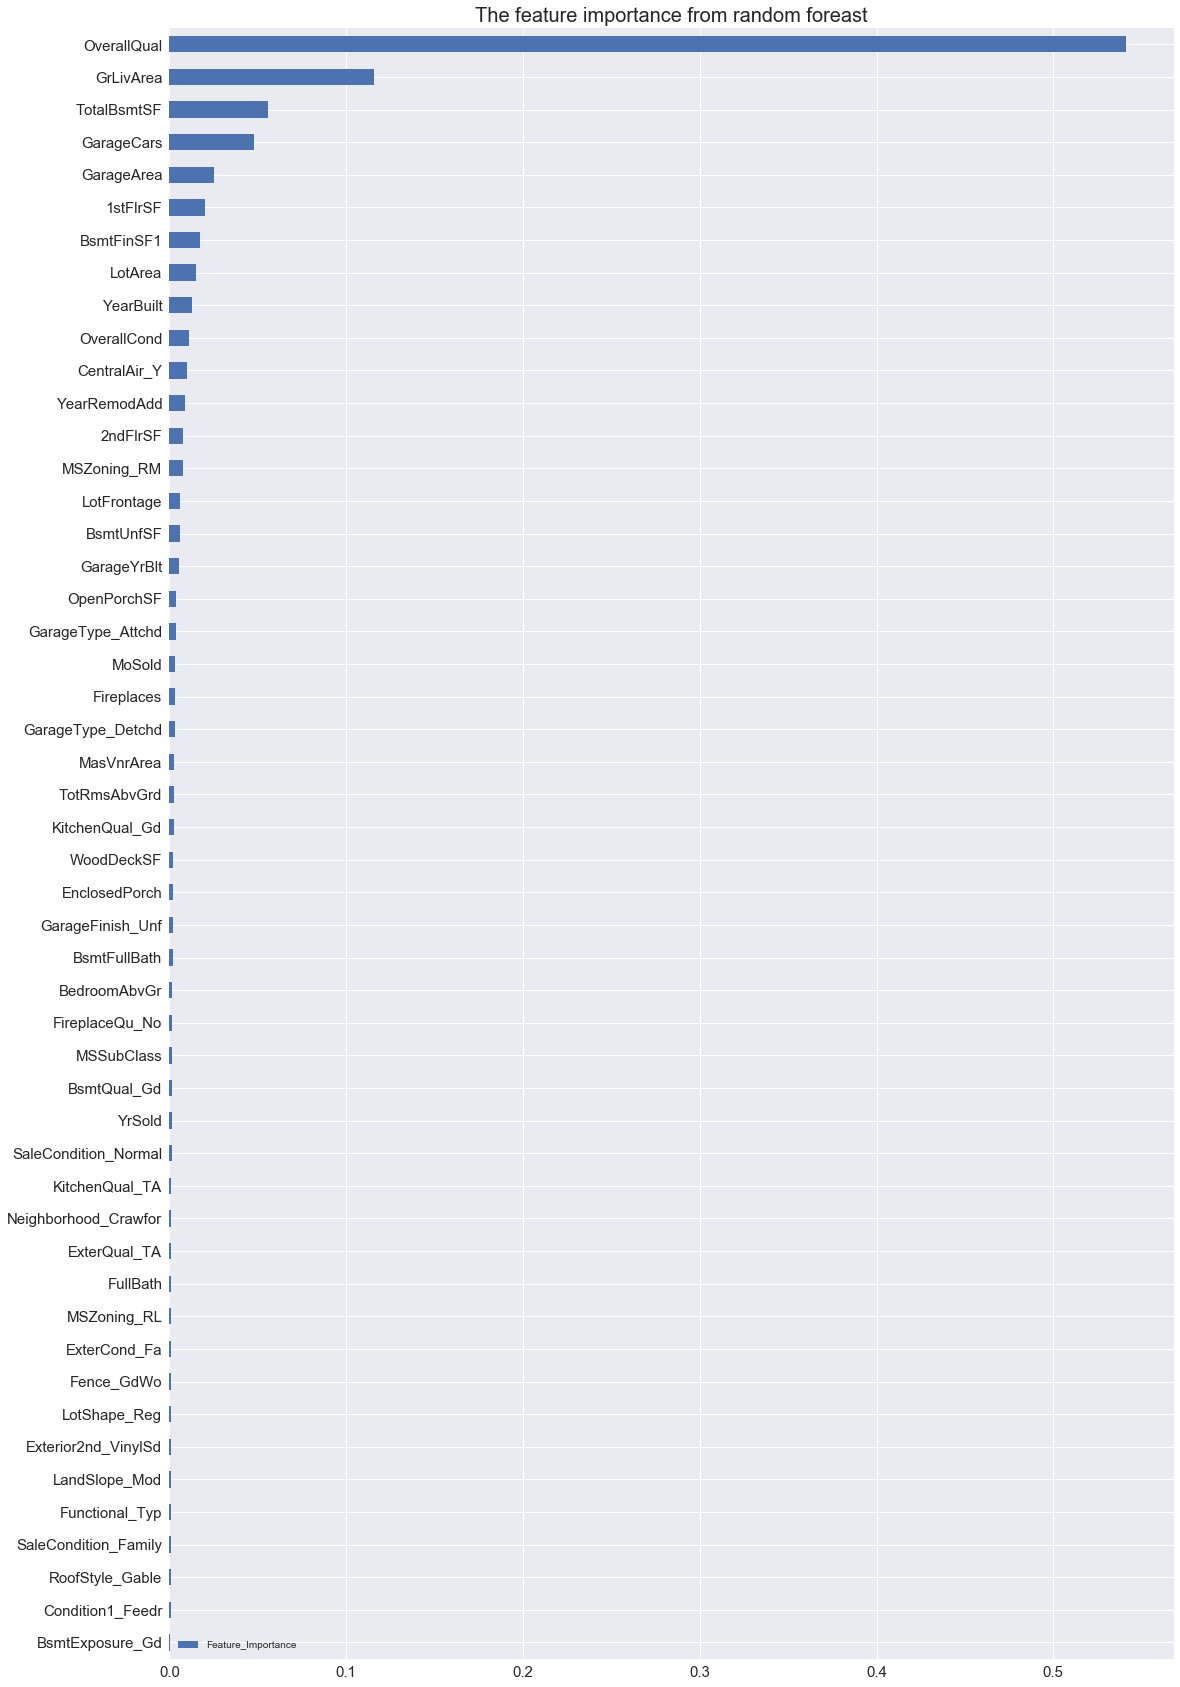

In [79]:
#plot the feature importance
ax = fea_import.iloc[-50:, :].plot.barh(figsize = (18,30),fontsize = 15)
ax.set_title("The feature importance from random foreast", fontsize = 20)

In [84]:
#select top20
top20 = fea_import.index[-20:]

In [127]:
#subset X for ridge regression
X_ri = X[top20]

In [128]:
X_ri

,MoSold,GarageType_Attchd,OpenPorchSF,GarageYrBlt,BsmtUnfSF,LotFrontage,MSZoning_RM,2ndFlrSF,YearRemodAdd,CentralAir_Y,OverallCond,YearBuilt,LotArea,BsmtFinSF1,1stFlrSF,GarageArea,GarageCars,TotalBsmtSF,GrLivArea,OverallQual
0,2,1.0,61,2003.0,150,65.0,0.0,854,2003,1.0,5,2003,8450,706,856,548,2,856,1710,7
1,5,1.0,0,1976.0,284,80.0,0.0,0,1976,1.0,8,1976,9600,978,1262,460,2,1262,1262,6
2,9,1.0,42,2001.0,434,68.0,0.0,866,2002,1.0,5,2001,11250,486,920,608,2,920,1786,7
3,2,0.0,35,1998.0,540,60.0,0.0,756,1970,1.0,5,1915,9550,216,961,642,3,756,1717,7
4,12,1.0,84,2000.0,490,84.0,0.0,1053,2000,1.0,5,2000,14260,655,1145,836,3,1145,2198,8
5,10,1.0,30,1993.0,64,85.0,0.0,566,1995,1.0,5,1993,14115,732,796,480,2,796,1362,5
6,8,1.0,57,2004.0,317,75.0,0.0,0,2005,1.0,5,2004,10084,1369,1694,636,2,1686,1694,8
7,11,1.0,204,1973.0,216,NaN,0.0,983,1973,1.0,6,1973,10382,859,1107,484,2,1107,2090,7
8,4,0.0,0,1931.0,952,51.0,1.0,752,1950,1.0,5,1931,6120,0,1022,468,2,952,1774,7
9,1,1.0,4,1939.0,140,50.0,0.0,0,1950,1.0,6,1939,7420,851,1077,205,1,991,1077,5


In [129]:
#replace the NaN with mean
imp = imp.fit(X_ri)
X_ri = imp.transform(X_ri)

In [130]:
alphas = np.logspace(-6,4,11)
rcv = RidgeCV(alphas = alphas, store_cv_values=True,normalize=False)
rcv.fit(X_ri,y)
cv_vals = rcv.cv_values_
LOOr = cv_vals.mean(axis=0)
#zip(alphas,LOOr)

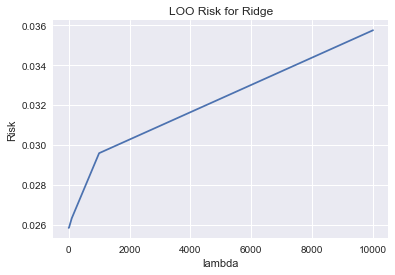

In [131]:
plt.plot(alphas,LOOr)
plt.xlabel('lambda')
plt.ylabel('Risk')
plt.title('LOO Risk for Ridge')
#plt.xlim([0,100])
#plt.ylim([0.006,0.010])
plt.show()

In [132]:
min(dict(zip(alphas,LOOr)).items(), key=lambda x: x[1])
#the minimum MSE is 0.02584

(1.0, 0.02583770764954129)

In [35]:
mse = np.mean((yte - rfr.predict(Xte))**2)

In [50]:
kf = KFold(n_splits = 5)

In [51]:
rfrloo = cross_val_score(rfr, X_imp, y, cv = kf, scoring = 'neg_mean_squared_error')

In [52]:
np.mean(rfrloo)

-0.022005433910769069